In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import KFold


In [27]:
col = ['x1','x2']
traindata = pd.read_csv('D:/Desktop/exam4introtoml/train.csv',sep='\t',names=col)
testdata = pd.read_csv('D:/Desktop/exam4introtoml/test.csv',sep='\t',names=col)
traindata_array = np.array(traindata)

In [28]:
x1_train = traindata.iloc[:,0:1].values
x2_train = traindata.iloc[:,-1].values
#x2_train = np.ravel(x2_train)

x1_test = testdata.iloc[:,0:1].values
x2_test = testdata.iloc[:,-1].values

x2_train.shape

(1000,)

Text(0, 0.5, 'x2')

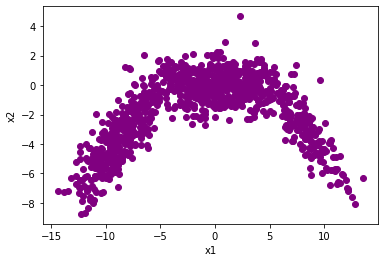

In [29]:
plt.scatter(x1_train,x2_train,color = 'purple')
plt.xlabel('x1')
plt.ylabel('x2')


In [30]:
def MLP(units):
    model = Sequential()
    model.add(Dense(units,input_shape=(1,),activation = 'softplus'))
    model.add(Dense(1,activation = 'linear'))
    model.compile(loss = 'mean_squared_error',optimizer='sgd',metrics=['mse'])
    return model
    

In [31]:
def get_scores(model,xtrain,xtest,ytrain,ytest,epochs):
    history = model.fit(xtrain,ytrain,epochs = epochs)
    loss,err = model.evaluate(xtest,ytest,verbose= 0)
    return loss,err

In [41]:
#peforming kfold cross validation
#neurons = [10,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500,600,700,800,900,1000]
neurons = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
scores = []
kfold = KFold(n_splits=10)
for i in neurons:
    print("NEURONS = ",i)
    for te,tr in kfold.split(x1_train):
        x_tr,x_te = x1_train[tr],x1_train[te]
        y_tr,y_te = x2_train[tr],x2_train[te]
        model = MLP(i)
        loss,err = get_scores(model,x_tr,x_te,y_tr,y_te,100)
#         model = MLP(i)
#         history = model.fit(x_tr,y_tr,epochs = 50)
#         loss,err = model.evaluate(x_te,y_te,verbose= 0)
        scores.append(err)

NEURONS =  1
Epoch 1/100
100/100 [==============================] - 0s 1ms/step - loss: 17.0438 - mse: 17.0438
Epoch 2/100
100/100 [==============================] - 0s 30us/step - loss: 9.9691 - mse: 9.9691
Epoch 3/100
100/100 [==============================] - 0s 50us/step - loss: 8.9981 - mse: 8.9981
Epoch 4/100
100/100 [==============================] - 0s 50us/step - loss: 8.4389 - mse: 8.4389
Epoch 5/100
100/100 [==============================] - 0s 50us/step - loss: 8.0643 - mse: 8.0643
Epoch 6/100
100/100 [==============================] - 0s 40us/step - loss: 7.9019 - mse: 7.9019
Epoch 7/100
100/100 [==============================] - 0s 50us/step - loss: 7.7667 - mse: 7.7667
Epoch 8/100
100/100 [==============================] - 0s 50us/step - loss: 7.7227 - mse: 7.7227
Epoch 9/100
100/100 [==============================] - 0s 50us/step - loss: 7.5554 - mse: 7.5554
Epoch 10/100
100/100 [==============================] - 0s 50us/step - loss: 7.3719 - mse: 7.3719
Epoch 11/100
10

In [42]:

mean_score = []
mean_loss = []

for j in range(0,len(neurons)):
    w = j*10
    avg_scores = np.average(scores[w:w+len(neurons)])
    mean_score.append(avg_scores)



Text(0.5, 1.0, 'mse vs neurons')

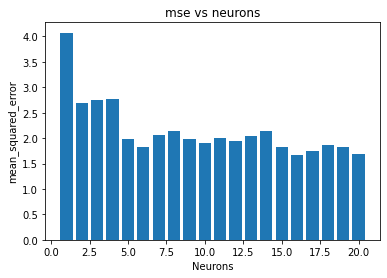

In [43]:

plt.bar(neurons,mean_score)
plt.xlabel('Neurons')
plt.ylabel('mean_squared_error')
#plt.xticks(range(1, 21))
plt.title('mse vs neurons')

In [44]:
optimum_neuron = np.argmin(mean_score)
optimum_neuron

15

In [45]:
unit = neurons[optimum_neuron]
unit

16

In [46]:
mean_score[optimum_neuron]

1.6732158422470094

In [47]:
optimum_model = MLP(unit)
optimum_model.fit(x1_train,x2_train,epochs = 200)
ypred = optimum_model.predict(x1_test)

Epoch 1/200
1000/1000 [==============================] - 0s 146us/step - loss: 3.0725 - mse: 3.0725
Epoch 2/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.8910 - mse: 1.8910
Epoch 3/200
1000/1000 [==============================] - 0s 25us/step - loss: 1.7215 - mse: 1.7215
Epoch 4/200
1000/1000 [==============================] - 0s 26us/step - loss: 1.5863 - mse: 1.5863
Epoch 5/200
1000/1000 [==============================] - 0s 25us/step - loss: 1.5638 - mse: 1.5638
Epoch 6/200
1000/1000 [==============================] - 0s 27us/step - loss: 1.5453 - mse: 1.5453
Epoch 7/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.5696 - mse: 1.5696
Epoch 8/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.5767 - mse: 1.5767
Epoch 9/200
1000/1000 [==============================] - 0s 26us/step - loss: 1.5677 - mse: 1.5677
Epoch 10/200
1000/1000 [==============================] - 0s 23us/step - loss: 1.5909 - mse: 1.5909
Epoch 11

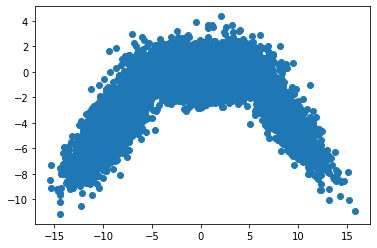

In [14]:
plt.scatter(x1_test,x2_test)

In [48]:
x2_test = np.reshape(x2_test,(10000,1))
ypred  = np.reshape(ypred,(10000,1))
#x2_train = np.reshape(x2_train,(1000,1))

Text(0.5, 1.0, 'Predicted data')

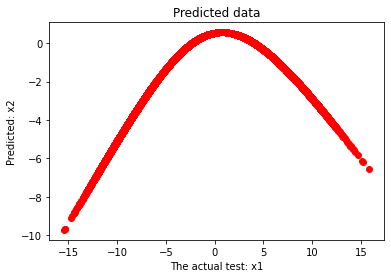

In [49]:
plt.scatter(x1_test,ypred,color = 'red')
plt.xlabel('The actual test: x1')
plt.ylabel('Predicted: x2')
plt.title('Predicted data')

In [50]:
col = ['pred','actual']
kk = np.concatenate((ypred,x2_test),axis=1)
df = pd.DataFrame(kk,columns=col)
df

,pred,actual
0,-0.462941,-1.365302
1,-0.292233,-0.284208
2,0.568075,1.022696
3,-4.462388,-5.740704
4,-0.982257,-0.189893
...,...,...
9995,-0.619630,0.710251
9996,-0.264519,-0.637562
9997,0.332545,-0.008831
9998,0.002383,2.188140


In [51]:
from sklearn.metrics import mean_squared_error
acc = mean_squared_error(x2_test,ypred)
acc

1.7685695901137053